<a href="https://colab.research.google.com/github/mars241/WebScraping/blob/main/AAM_WCS_Parse_a_JSON_file_Challenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🦾Challenge
Dans ce défi, vous devrez importer et analyser [ce fichier JSON](https://raw.githubusercontent.com/murpi/wilddata/master/quests/monthlySalesbyCategoryMultiple.json), et afficher un DataFrame complet.

Votre DataFrame doit comporter 24 lignes. Les premières lignes du résultat attendu sont ici :

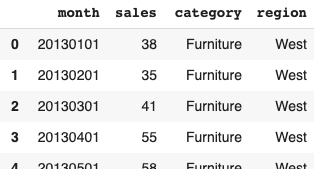

In [ ]:
# téléchager les bibliothèques
import json
import requests
# Lien du fichier à parser
url="https://raw.githubusercontent.com/murpi/wilddata/master/quests/monthlySalesbyCategoryMultiple.json"
#  lancement du "requests" et affectation du dataset par la lecture du contenu JSON
r = requests.get(url)
dataset = json.loads( r.text)

In [ ]:
# afficher la Dataframe
dataset

{'contents': [{'category': 'Furniture',
   'region': 'West',
   'monthlySales': [{'month': 20130101, 'sales': 38},
    {'month': 20130201, 'sales': 35},
    {'month': 20130301, 'sales': 41},
    {'month': 20130401, 'sales': 55},
    {'month': 20130501, 'sales': 58},
    {'month': 20130601, 'sales': 66},
    {'month': 20130701, 'sales': 74},
    {'month': 20130801, 'sales': 78},
    {'month': 20130901, 'sales': 38},
    {'month': 20131001, 'sales': 30},
    {'month': 20131101, 'sales': 26},
    {'month': 20131201, 'sales': 29}]},
  {'category': 'Technology',
   'region': 'West',
   'monthlySales': [{'month': 20130101, 'sales': 54},
    {'month': 20130201, 'sales': 66},
    {'month': 20130301, 'sales': 77},
    {'month': 20130401, 'sales': 70},
    {'month': 20130501, 'sales': 60},
    {'month': 20130601, 'sales': 63},
    {'month': 20130701, 'sales': 55},
    {'month': 20130801, 'sales': 47},
    {'month': 20130901, 'sales': 55},
    {'month': 20131001, 'sales': 30},
    {'month': 20131

In [ ]:
# Afficher en datafram au 1er niveau avec pandas :
import pandas as pd
dataset_level1 = pd.json_normalize(r.json())
dataset_level1

,contents
0,"[{'category': 'Furniture', 'region': 'West', '..."


In [ ]:
#Lire JSON à partir de l'objet de requête
print(r.json())

{'contents': [{'category': 'Furniture', 'region': 'West', 'monthlySales': [{'month': 20130101, 'sales': 38}, {'month': 20130201, 'sales': 35}, {'month': 20130301, 'sales': 41}, {'month': 20130401, 'sales': 55}, {'month': 20130501, 'sales': 58}, {'month': 20130601, 'sales': 66}, {'month': 20130701, 'sales': 74}, {'month': 20130801, 'sales': 78}, {'month': 20130901, 'sales': 38}, {'month': 20131001, 'sales': 30}, {'month': 20131101, 'sales': 26}, {'month': 20131201, 'sales': 29}]}, {'category': 'Technology', 'region': 'West', 'monthlySales': [{'month': 20130101, 'sales': 54}, {'month': 20130201, 'sales': 66}, {'month': 20130301, 'sales': 77}, {'month': 20130401, 'sales': 70}, {'month': 20130501, 'sales': 60}, {'month': 20130601, 'sales': 63}, {'month': 20130701, 'sales': 55}, {'month': 20130801, 'sales': 47}, {'month': 20130901, 'sales': 55}, {'month': 20131001, 'sales': 30}, {'month': 20131101, 'sales': 22}, {'month': 20131201, 'sales': 77}]}]}


In [ ]:
# Afficher en datafram au 2eme niveau (format voulu) avec pandas :
dataset = pd.json_normalize(dataset["contents"],"monthlySales",["category","region"])
dataset

,month,sales,category,region
0,20130101,38,Furniture,West
1,20130201,35,Furniture,West
2,20130301,41,Furniture,West
3,20130401,55,Furniture,West
4,20130501,58,Furniture,West
5,20130601,66,Furniture,West
6,20130701,74,Furniture,West
7,20130801,78,Furniture,West
8,20130901,38,Furniture,West
9,20131001,30,Furniture,West


In [ ]:
# Extraire les attibuts (les clés et les valeurs) de format dictionnaire
for key in dataset:
  print("Clés:",key,"Valeurs:",dataset[key])

Clés: month Valeurs: 0     20130101
1     20130201
2     20130301
3     20130401
4     20130501
5     20130601
6     20130701
7     20130801
8     20130901
9     20131001
10    20131101
11    20131201
12    20130101
13    20130201
14    20130301
15    20130401
16    20130501
17    20130601
18    20130701
19    20130801
20    20130901
21    20131001
22    20131101
23    20131201
Name: month, dtype: int64
Clés: sales Valeurs: 0     38
1     35
2     41
3     55
4     58
5     66
6     74
7     78
8     38
9     30
10    26
11    29
12    54
13    66
14    77
15    70
16    60
17    63
18    55
19    47
20    55
21    30
22    22
23    77
Name: sales, dtype: int64
Clés: category Valeurs: 0      Furniture
1      Furniture
2      Furniture
3      Furniture
4      Furniture
5      Furniture
6      Furniture
7      Furniture
8      Furniture
9      Furniture
10     Furniture
11     Furniture
12    Technology
13    Technology
14    Technology
15    Technology
16    Technology
17    Technology
